In [5]:
# Load Libraries & Model
import numpy as np
import shap
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [6]:
# Load trained XGBoost model (same notebook or re-train quickly)
X_train = np.load("../data/processed/X_train.npy")
X_test  = np.load("../data/processed/X_test.npy")
y_train = np.load("../data/processed/y_train.npy")
y_test  = np.load("../data/processed/y_test.npy")



In [7]:
# Re-train XGBoost model
fraud_ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=fraud_ratio,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [8]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


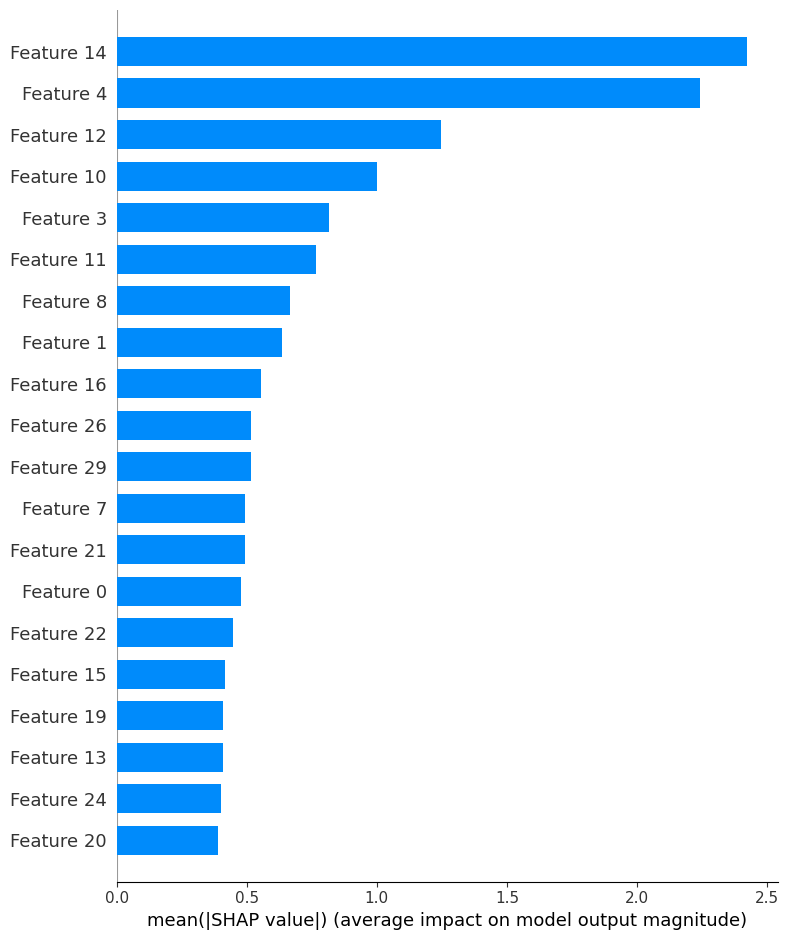

In [10]:
# Global Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("../results/shap_global_importance.png", bbox_inches="tight")
plt.show()


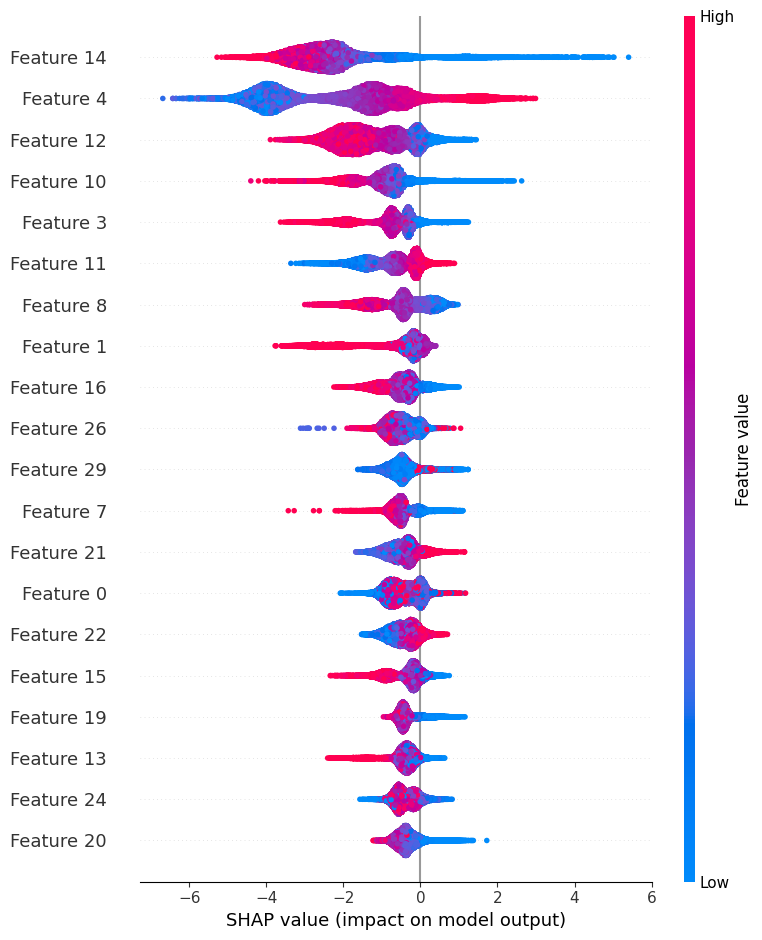

In [12]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("../results/shap_summary_plot.png", bbox_inches="tight")
plt.show()

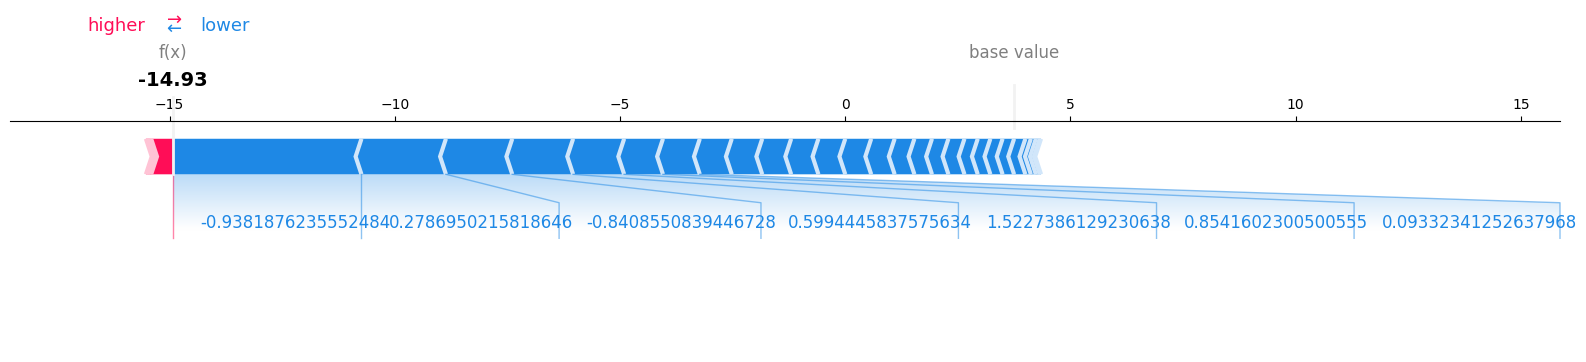

<Figure size 640x480 with 0 Axes>

In [13]:
# Create the force plot and render with matplotlib
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test[0],
    matplotlib=True
)
plt.savefig("../results/shap_force_plot_transaction_1.png", bbox_inches="tight")
plt.show()

## Individual Transaction Explanation (Explainable AI Perspective)

The SHAP force plot illustrates how individual transaction features contribute to the 
model’s fraud prediction for a specific case. Such transaction-level transparency is 
critical for auditing automated decisions, meeting regulatory requirements, and 
building trust in AI-driven financial systems.

Explainable decision-making enables responsible deployment of machine learning models 
within U.S. financial institutions and supports ethical, compliant innovation.


In [14]:
# Saving model
import joblib

joblib.dump(xgb_model, "../models/fraud_xgboost_model.pkl")


['../models/fraud_xgboost_model.pkl']